# 01-1 EDA: Clothing

In [2]:
from torchvision.io import read_image
from torchvision import transforms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- We start by reading in the meta data for each item.

In [3]:
articles = pd.read_csv('../data/articles.csv')

articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
articles.shape

(105542, 25)

In [6]:
articles.value_counts(subset='prod_name')

prod_name
Dragonfly dress          98
Mike tee                 72
Wow printed tee 6.99     70
1pk Fun                  55
TP Paddington Sweater    54
                         ..
Iaa skirt                 1
IZZY Tee Fancy            1
IZZY KNOT LOOSE TEE+      1
IZZY                      1
Åsa Dress                 1
Length: 45875, dtype: int64

- So we have 100,000+ clothing items but only 45,875 product names. The discrepancy comes from the fact that a single product can come in multiple colors or patterns.
- Let's take a look at the number of categories in a few other columns.

In [5]:
print(len(pd.unique(articles['product_type_name'])))

pd.unique(articles['product_type_name'])

131


array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Unknown',
       'Hoodie', 'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots',
       'Bikini top', 'Swimwear bottom', 'Underwear bottom', 'Swimsuit',
       'Skirt', 'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top',
       'Shorts', 'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers',
       'Sunglasses', 'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer',
       'Other shoe', 'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees',

In [6]:
print(len(pd.unique(articles['product_group_name'])))

pd.unique(articles['product_group_name'])

19


array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

- Let's try to read in some of the images to get a visual inspection of the clothes.

In [7]:
def get_image(article_id):
    id_string = '0'+str(article_id)
    folder = id_string[0:3]
    path = '../images/'+folder+'/'+id_string+'.jpg'
    return read_image(path)

torch.Size([3, 1750, 1166])
 


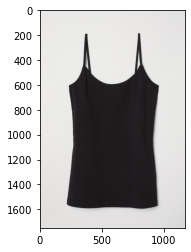

In [8]:
sample = get_image(articles.loc[0,'article_id'])

print(sample.shape)
print(" ")

plt.imshow(sample.permute(1,2,0));

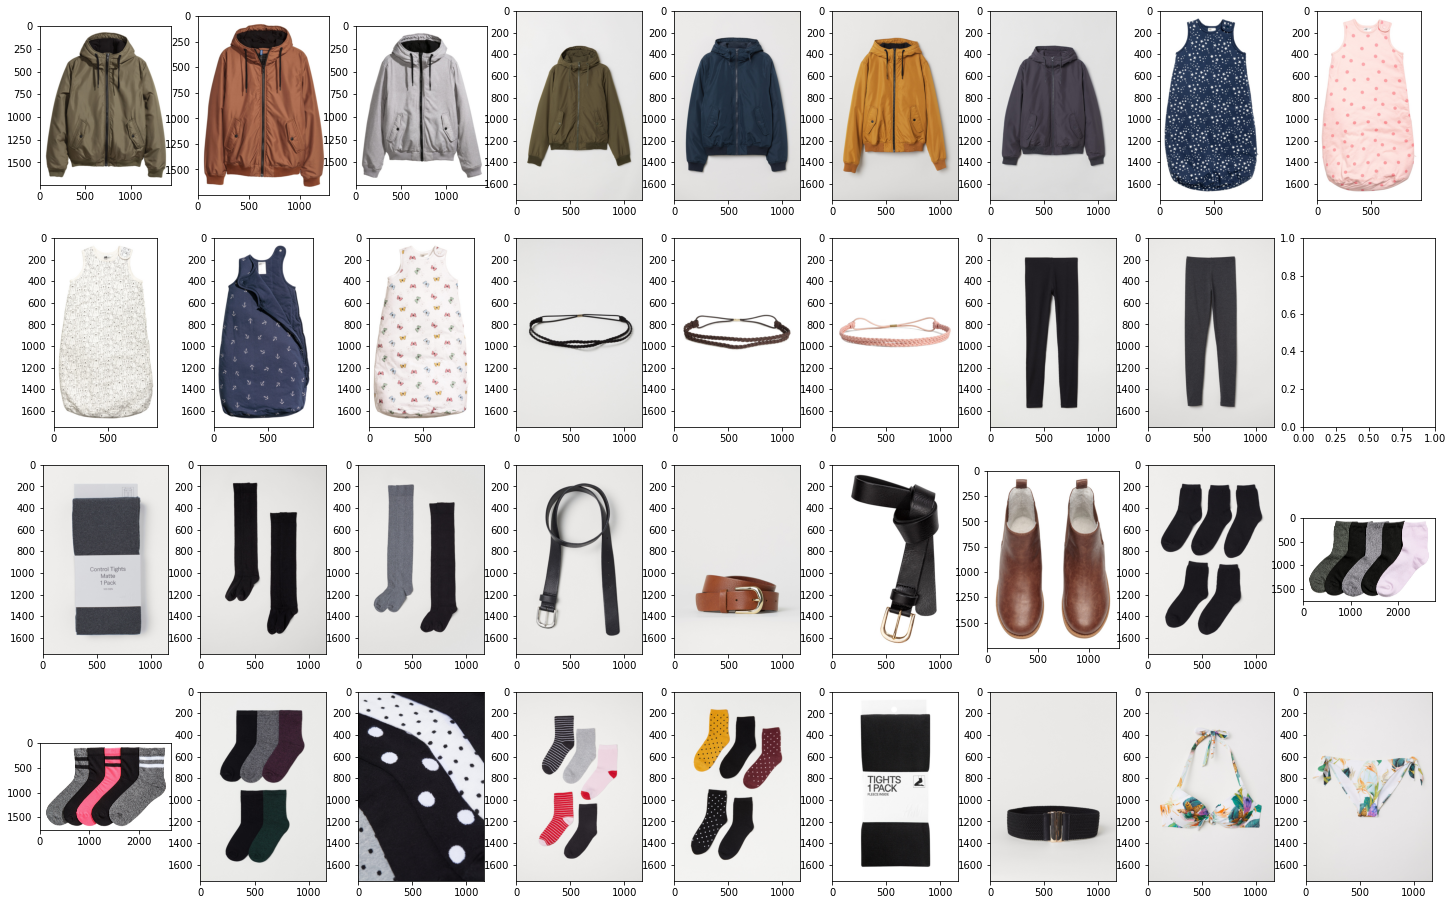

In [40]:
fig = plt.figure(figsize=(25, 16))

rows=4
columns=9

for i in range(36):
    fig.add_subplot(rows, columns, i+1)
    try:
        img = get_image(articles.loc[i+100,'article_id'])
        imgplot = plt.imshow(img.permute(1,2,0))
    except:
        pass


In [56]:
for i in range(36):
    try:
        img = get_image(articles.loc[i+100,'article_id'])
        print(img.shape[1],img.shape[2])
    except:
        print(articles.loc[i+100, 'article_id'], " not found. ")

1750 1447
1750 1288
1750 1449
1750 1166
1750 1166
1750 1166
1750 1166
1750 952
1750 959
1750 960
1750 919
1750 967
1750 1166
1750 1166
1750 1166
1750 1166
1750 1166
179208001  not found. 
1750 1166
1750 1166
1750 1166
1750 1166
1750 1166
1750 1166
1750 1300
1750 1166
1749 2760
1749 2653
1750 1166
1750 1166
1750 1166
1750 1166
1749 1166
1750 1166
1750 1166
1750 1166


- Notice: some of the items are missing images.

In [57]:
articles[ articles['article_id']==179208001]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
117,179208001,179208,Control Top 100 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Matt opaque tights with a control top to hold ...


Since we are missing images of certain items, let's we will clean the data set to remove these items from the transaction logs (See Notebook 00-1)